비지도 학습(Unsupervised Learning)은 기계 학습의 한 방식으로, 레이블이 지정되지 않은 데이터로부터 패턴이나 구조를 찾아내는 데 초점을 맞추고 있습니다. 이러한 학습 방식은 입력 데이터만 주어지고, 명확한 정답이나 출력 값 없이 데이터 자체의 구조나 관계를 탐색합니다. 비지도 학습의 주요 목표는 데이터 내 숨겨진 특징이나 패턴을 발견하는 것입니다. 주요 유형과 그 예시는 다음과 같습니다

- 클러스터링(Clustering): 비슷한 특성을 가진 데이터 포인트들을 그룹으로 묶는 과정입니다. 예를 들어, 고객 데이터를 분석하여 비슷한 쇼핑 습관을 가진 고객 그룹을 형성할 수 있습니다. 대표적인 알고리즘으로는 K-평균(K-means), 계층적 클러스터링(Hierarchical clustering) 등이 있습니다.

- 차원 축소(Dimensionality Reduction): 데이터의 특성(차원)을 줄이면서 중요한 정보를 유지하는 방법입니다. 이는 데이터의 시각화나 더 효과적인 저장 및 처리를 가능하게 합니다. 대표적인 기법으로 주성분 분석(PCA), t-SNE 등이 있습니다.

- 연관 규칙 학습(Association Rule Learning): 데이터 아이템 간의 종종 발생하는 흥미로운 관계를 찾아내는 방법입니다. 예를 들어, 슈퍼마켓에서 고객이 특정 상품을 함께 구매하는 패턴을 발견할 수 있습니다. Apriori, Eclat 같은 알고리즘이 이에 해당합니다.

- 이상 탐지(Anomaly Detection): 데이터에서 이상치 또는 예외를 탐지하는 과정입니다. 예를 들어, 신용 카드 사기 탐지, 기계의 고장 탐지 등에 사용됩니다. 이상치 탐지는 데이터의 일반적인 패턴에서 벗어난 경우를 식별하여 중요한 통찰을 제공할 수 있습니다.

- 자기 조직화 맵(Self-Organizing Maps, SOMs) 및 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA): SOMs는 데이터의 시각화 및 차원 축소에 사용되며, LDA는 주로 텍스트 데이터에서 주제를 추출하는 데 사용됩니다.

비지도 학습은 레이블링 비용이 많이 들거나 불가능한 경우 유용하게 사용될 수 있으며, 데이터의 숨겨진 구조를 이해하는 데 강력한 도구로 활용됩니다. 이를 통해 보다 깊이 있는 데이터 분석과 더 정교한 머신러닝 모델의 개발이 가능해집니다.

# k-means 구현하기

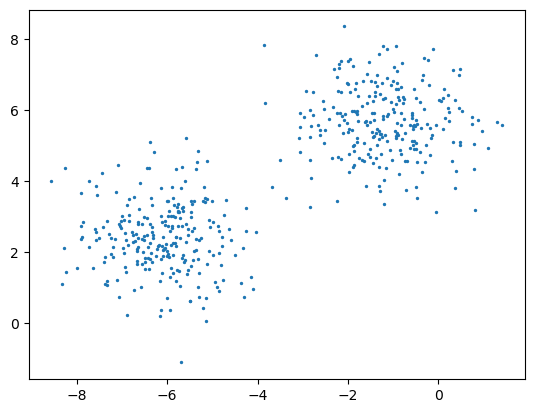

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

X = make_blobs(n_samples=500, centers=2, random_state=1234)[0]
plt.scatter(X[:, 0], X[:, 1], s=2)

In [6]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])


kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(f'샘플별 군집 번호: {kmeans.labels_}')


샘플별 군집 번호: [1 1 1 0 0 0]


# 계층적 군집화 구현하기

In [7]:
import numpy as np

X = np.array([[1, 0], [1, 3], [0, 1], [4, 9], [3, -2], [-1, 1]])

In [8]:
clusters = [[X[i]] for i in range(len(X))]
print(f'초기 군집: {clusters}')

초기 군집: [[array([1, 0])], [array([1, 3])], [array([0, 1])], [array([4, 9])], [array([ 3, -2])], [array([-1,  1])]]


In [9]:
def dist(A, B):
    val = np.inf
    for a in A:
        for b in B:
            tmp = np.linalg.norm(a - b)
            if tmp < val: val = tmp
    return val

In [10]:
while len(clusters) > 1:
    val = np.inf
    ind1 = -1
    ind2 = -1
    # a > b
    for a in range(len(clusters)):
        for b in range(a):
            tmp = dist(clusters[a], clusters[b])
            if tmp < val:
                val = tmp
                ind1 = a
                ind2 = b
    c1 = clusters.pop(ind1)
    c2 = clusters.pop(ind2)
    
    clusters.append(c1 + c2)
    print(f'단계 {6 - len(clusters)}: {clusters}')

단계 1: [[array([1, 0])], [array([1, 3])], [array([4, 9])], [array([ 3, -2])], [array([-1,  1]), array([0, 1])]]
단계 2: [[array([1, 3])], [array([4, 9])], [array([ 3, -2])], [array([-1,  1]), array([0, 1]), array([1, 0])]]
단계 3: [[array([4, 9])], [array([ 3, -2])], [array([-1,  1]), array([0, 1]), array([1, 0]), array([1, 3])]]
단계 4: [[array([4, 9])], [array([-1,  1]), array([0, 1]), array([1, 0]), array([1, 3]), array([ 3, -2])]]
단계 5: [[array([-1,  1]), array([0, 1]), array([1, 0]), array([1, 3]), array([ 3, -2]), array([4, 9])]]


In [11]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

In [15]:
clustering1 = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(X)
print(f'군집의 수를 설정한 모델링 결과: {clustering1.labels_}')

군집의 수를 설정한 모델링 결과: [0 0 1 0 0 1]


In [16]:
clustering2 = AgglomerativeClustering(n_clusters=None,
                                      linkage='complete',
                                      distance_threshold=2.5).fit(X)
print(f'군집화 기준 거리를 설정한 모델링 결과: {clustering2.labels_}')

군집화 기준 거리를 설정한 모델링 결과: [2 2 3 0 0 1]


In [17]:
clustering3 = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X)
print(f'군집의 수를 4로 설정한 모델링 결과: {clustering3.labels_}')

군집의 수를 4로 설정한 모델링 결과: [2 2 3 0 0 1]


In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

X = load_iris().data

In [19]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

In [20]:
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([model.children_, model.distances_,
                                  counts]).astype(float)

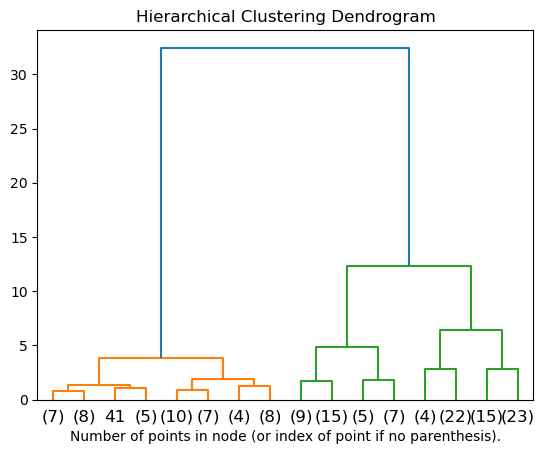

In [21]:
dendrogram(linkage_matrix, truncate_mode="level", p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

K-평균 클러스터링(K-Means Clustering)
K-평균 클러스터링은 데이터 포인트를 K개의 클러스터로 그룹화하는 알고리즘입니다. 이 방법은 클러스터 내 분산을 최소화하는 것을 목표로 합니다.

주요 특징:

클러스터의 수 
𝐾
K를 사전에 정해야 합니다.
각 클러스터의 중심을 계산하고, 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당합니다.
계산이 빠르고 대규모 데이터에 효율적입니다.
클러스터의 모양이 구형일 때 잘 작동합니다.

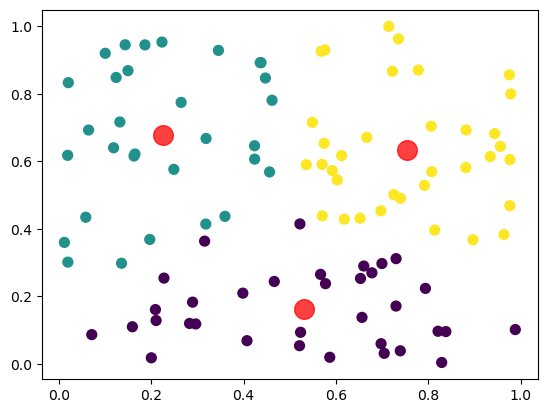

In [22]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 임의의 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 2)

# KMeans 객체 생성, 여기서는 3개의 클러스터를 지정
kmeans = KMeans(n_clusters=3)

# 모델 피팅 및 레이블 예측
kmeans.fit(X)
labels = kmeans.predict(X)

# 클러스터링 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()


### 계층적 군집화(Hierarchical Clustering)
계층적 군집화는 데이터를 계층적인 트리 구조로 조직화하는 알고리즘입니다. 이 방법은 각 단계에서 가장 가까운 클러스터 또는 데이터 포인트를 병합하면서 진행됩니다.

주요 특징:

덴드로그램을 통해 클러스터의 수를 시각적으로 결정할 수 있습니다.
병합 방식에 따라 "단일 연결", "완전 연결", "평균 연결" 등의 방법이 있습니다.
데이터의 자연스러운 구조를 잘 반영할 수 있습니다.

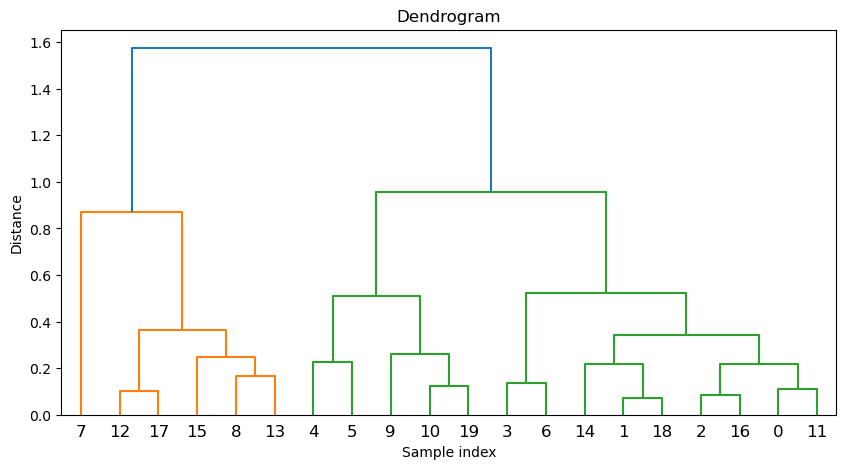

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# 임의의 데이터 생성
np.random.seed(0)
X = np.random.rand(20, 2)

# 데이터에 대한 계층적 클러스터링 수행
Z = linkage(X, 'ward')

# 덴드로그램 그리기
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


지도학습(Supervised Learning)과 비지도학습(Unsupervised Learning)은 머신러닝의 두 주요 학습 유형으로, 각각의 접근 방식은 데이터로부터 지식을 추출하고 예측 모델을 구축하는데 있어 서로 다른 목적과 기법을 사용합니다. 

## 지도학습(Supervised Learning) vs 비지도학습(Unsupervised Learning)
1. 정의 및 목적
- 지도학습: 레이블이 지정된 학습 데이터를 사용하여 입력(X)과 출력(Y) 간의 매핑 함수를 학습합니다. 목표는 주어진 입력에 대해 올바른 출력을 예측하는 모델을 구축하는 것입니다.
- 비지도학습: 출력 변수 없이 입력 데이터만을 사용합니다. 데이터의 숨겨진 구조나 패턴을 찾는 것이 목적입니다.

2. 주요 사용 사례
- 지도학습: 분류(Classification)와 회귀(Regression) 문제에서 사용됩니다. 예를 들어, 이메일 스팸 감지, 주택 가격 예측 등이 있습니다.
- 비지도학습: 클러스터링(Clustering), 차원 축소(Dimensionality Reduction), 연관 규칙(Association Rules)과 같은 작업에 적합합니다. 예를 들어, 고객 세분화, 주성분 분석을 통한 데이터 시각화 등이 있습니다.

3. 평가 방법
- 지도학습: 정확도, 정밀도, 재현율, F1 점수, 평균 제곱 오차 등의 명확한 평가 지표를 사용하여 모델 성능을 평가합니다.
- 비지도학습: 명확한 정답이 없기 때문에, 실루엣 점수, 데이비스-볼딘 지수 등 클러스터의 품질을 평가하는 지표를 사용하거나 결과의 해석에 더 의존합니다.

4. 알고리즘 예시
- 지도학습: 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression), 결정 트리(Decision Trees), 랜덤 포레스트(Random Forests), 신경망(Neural Networks)
- 비지도학습: K-평균(K-Means), 계층적 클러스터링(Hierarchical Clustering), DBSCAN, 주성분 분석(PCA), t-SNE

In [26]:
# 지도학습- 선형회귀

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 임의의 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.8111606286982092


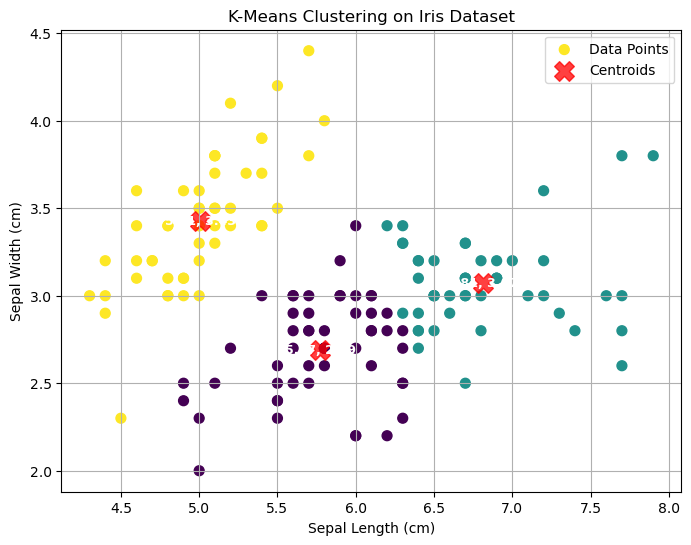

In [29]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

# iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 특성만 사용 (꽃받침의 길이와 너비)

# KMeans 클러스터링 수행, 3개의 클러스터 지정
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# 클러스터링 결과 저장
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')  # 데이터 포인트
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')  # 중심점

# 각 클러스터 중심에 대한 좌표 표시
for i, center in enumerate(centers):
    plt.text(center[0], center[1], f'{center[0]:.2f}, {center[1]:.2f}', 
             fontdict={'weight': 'bold', 'size': 9},
             ha='center', va='center', color='white')

# 추가적인 그래픽 옵션
plt.title('K-Means Clustering on Iris Dataset')  # 제목 설정
plt.xlabel('Sepal Length (cm)')  # X축 레이블
plt.ylabel('Sepal Width (cm)')  # Y축 레이블
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시
plt.show()

